# Hi
## This is markdown
### This is the dataset link https://www.kaggle.com/datasets/fatemehmehrparvar/dementia/data

In [2]:
#import stuffs
import numpy as np
import pandas as pd

In [3]:
#my dementia dataset see if it works
dataset = pd.read_csv('C:/Users/tp-limwj/Downloads/dementia.csv')
dataset.head()
display(dataset)

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,female,0.0,0,13.0,-0.100000,-0.020000,-0.260000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,0,Zero,0
1838,990,71.00,female,0.0,0,13.0,-0.370000,-1.060000,-1.003333,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,NaN,NaN,1,Zero,0
1839,991,55.00,male,0.0,0,10.0,0.460000,0.960000,0.610000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,0,Zero,0
1840,995,54.00,male,0.0,0,10.0,0.190000,0.030000,0.590000,0,...,Yes,zero,0 to 1,ASPS-elderly,ASPS,0.0,0.0,1,Zero,0


# Data Cleaning

In [4]:
#Data types of each variable
print(dataset.dtypes)

ID                        int64
age                     float64
gender                   object
dementia                float64
dementia_all              int64
educationyears          float64
EF                      float64
PS                      float64
Global                  float64
diabetes                  int64
smoking                  object
hypertension             object
hypercholesterolemia     object
lacunes_num              object
fazekas_cat              object
study                    object
study1                   object
SVD Simple Score        float64
SVD Amended Score       float64
Fazekas                   int64
lac_count                object
CMB_count                object
dtype: object


In [5]:
#delete useless columns that idk like dementia, lacunes_num(cus alr in lac_count), study, study1 and fazekas_cat
dataset_clean = dataset.copy()
columns_to_drop = ['dementia', 'lacunes_num', 'study', 'study1', 'fazekas_cat']
dataset_clean.drop(columns = columns_to_drop, axis =1, inplace=True)
display(dataset_clean)

,ID,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0,11.0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,3.0,7.0,3,>5,>=1
1,10,64.58,male,0,10.0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0,8.0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1,9.0,NaN,-2.136271,-1.301102,0,current-smoker,Yes,Yes,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0,10.0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,2.0,3.0,2,1 to 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,989,67.00,female,0,13.0,-0.100000,-0.020000,-0.260000,0,never-smoker,Yes,Yes,NaN,NaN,0,Zero,0
1838,990,71.00,female,0,13.0,-0.370000,-1.060000,-1.003333,0,never-smoker,Yes,Yes,NaN,NaN,1,Zero,0
1839,991,55.00,male,0,10.0,0.460000,0.960000,0.610000,0,ex-smoker,No,Yes,0.0,0.0,0,Zero,0
1840,995,54.00,male,0,10.0,0.190000,0.030000,0.590000,0,ex-smoker,No,Yes,0.0,0.0,1,Zero,0


In [6]:
dataset2 = dataset_clean.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print(dataset2.isnull().sum())

# of Rows, # of Columns:  (1842, 16)

Column Name           # of Null Values

ID                        0
age                       0
gender                    0
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
dtype: int64


In [7]:
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name              % Null Values\n")
print(dataset2.isnull().sum()/1842*100) #1842 is the total number of data

# of Rows, # of Columns:  (1842, 16)

Column Name              % Null Values

ID                       0.000000
age                      0.000000
gender                   0.000000
dementia_all             0.000000
educationyears           0.000000
EF                      11.292074
PS                      14.549403
Global                  16.720955
diabetes                 0.000000
smoking                  0.597177
hypertension             0.000000
hypercholesterolemia     0.000000
SVD Simple Score        36.753529
SVD Amended Score       36.753529
Fazekas                  0.000000
lac_count                0.000000
dtype: float64


In [8]:
#Extraction of possible data leakage variables such as SVD SIMPLe score and amended score
dataset_leakage = pd.DataFrame(dataset_clean[['SVD Simple Score', 'SVD Amended Score', 'dementia_all']])
display(dataset_leakage)

,SVD Simple Score,SVD Amended Score,dementia_all
0,3.0,7.0,0
1,2.0,3.0,0
2,1.0,2.0,0
3,2.0,4.0,1
4,2.0,3.0,0
...,...,...,...
1837,NaN,NaN,0
1838,NaN,NaN,0
1839,0.0,0.0,0
1840,0.0,0.0,0


In [9]:
dataset_leakage.corr()

,SVD Simple Score,SVD Amended Score,dementia_all
SVD Simple Score,1.000000,0.901032,0.233746
SVD Amended Score,0.901032,1.000000,0.286705
dementia_all,0.233746,0.286705,1.000000


## Thus 0.23/0.28, not much correlation to prob of dementia, so no data leakage

# So its time to train model

### This is XGBoost

C:\Users\tp-limwj\AppData\Local\Temp\ipykernel_15140\2228908401.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset_clean.fillna(method='ffill', inplace=True)


Accuracy: 0.9349005424954792
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       527
           1       0.14      0.08      0.10        26

    accuracy                           0.93       553
   macro avg       0.55      0.53      0.53       553
weighted avg       0.92      0.93      0.93       553

ROC-AUC Score: 0.5270763392205517


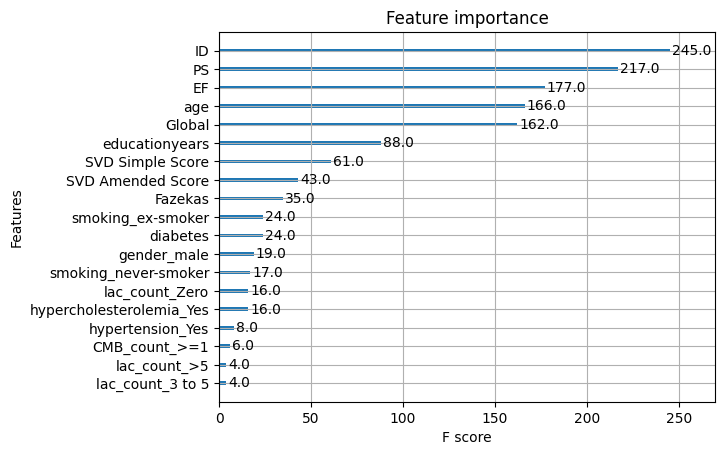

In [13]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Preprocessing steps (example)
dataset_clean.fillna(method='ffill', inplace=True)
dataset = pd.get_dummies(dataset_clean, drop_first=True)

# Define features and target
X = dataset.drop('dementia_all', axis=1)
y = dataset['dementia_all']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

# Initialize and train the XGBoost classifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred)) #trade off between true positive and false positive

# Feature importance
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(model) #fscore is how many times a feature is used in all trees
plt.show()

### This is K Nearest Neighbours

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_k = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors: {best_k}")

# Train the KNN classifier with the best number of neighbors
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Best number of neighbors: 22
Accuracy: 0.9529837251356239
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       527
           1       0.00      0.00      0.00        26

    accuracy                           0.95       553
   macro avg       0.48      0.50      0.49       553
weighted avg       0.91      0.95      0.93       553

ROC-AUC Score: 0.5


C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

### This is Support Vector Machine

In [15]:
from sklearn.svm import SVC

#Initialize and train the SVM classifier
model = SVC(probability=True)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.9529837251356239
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       527
           1       0.00      0.00      0.00        26

    accuracy                           0.95       553
   macro avg       0.48      0.50      0.49       553
weighted avg       0.91      0.95      0.93       553

ROC-AUC Score: 0.681725295577288


C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

### This is Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

#Initialize and train the logistic regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.9475587703435805
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       527
           1       0.33      0.12      0.17        26

    accuracy                           0.95       553
   macro avg       0.65      0.55      0.57       553
weighted avg       0.93      0.95      0.94       553

ROC-AUC Score: 0.8278353525032842


C:\Users\tp-limwj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### This is Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

#Initialize and train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.9421338155515371
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       527
           1       0.25      0.12      0.16        26

    accuracy                           0.94       553
   macro avg       0.60      0.55      0.56       553
weighted avg       0.92      0.94      0.93       553

ROC-AUC Score: 0.8014888337468982
